In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [4]:
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# Sklearn regression model evaluation functions
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

### Lectura de Train & Test sets

In [6]:
data = pd.read_csv('Delayed_Flights_no_dummies_train.csv', ',')
#test = pd.read_csv('Delayed_Flights_test_final.csv', ',')

In [7]:
len(data)

1542690

### Reducción de Muestra para facilitar y agilizar implementación de modelos

In [8]:
reduced_sample_train, reduced_sample_test = train_test_split(data, test_size = 0.8, random_state=42)

In [9]:
len(reduced_sample_train)

308538

In [10]:
train, test = train_test_split(reduced_sample_train, test_size = 0.2, random_state=42)

In [11]:
train.head()

,Unnamed: 0,index,DayOfWeek,FullCarrier,Origin,Dest,Cancelled,ArrDelay,CRSElapsedTime,DepDelay,ArrTime,DepTime,AirTime,Distance,AvgSpeed,10%_Delayed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range
433956,433957,1370696,1,Atlantic Southeast Airlines,ATL,MDT,0,-0.654889,-0.269780,-0.470946,20:08,18:26,-0.295680,-0.254649,0.246426,0,-0.567365,Not_delayed,2000-2059,1800-1859
1178304,1178309,610718,7,American Airlines Inc.,BOS,ORD,0,0.172920,0.502599,0.298884,16:52,15:09,0.360211,0.177614,-0.058033,1,-0.150075,20_to_40%_Delay,1600-1659,1500-1559
1331798,1331804,836451,4,Southwest Airlines Co.,SMF,PDX,0,-0.232178,-0.691077,-0.508498,07:54,06:16,-0.295680,-0.498669,-0.693538,1,-0.094542,20_to_40%_Delay,0700-0759,0600-0659
1473141,1473147,957758,4,Northwest Airlines Inc.,IND,DTW,0,-0.795793,-0.859596,-0.639933,14:42,13:41,-0.936995,-0.930932,-0.807661,0,-0.700645,Not_delayed,1400-1459,1300-1359
1221532,1221538,1184080,5,United Air Lines Inc.,PHL,LAX,0,-0.038436,2.847822,-0.320735,10:45,07:54,2.808869,2.851370,0.803255,1,-0.446779,10_to_20%_Delay,1000-1059,0700-0759


In [12]:
train.columns

Index(['Unnamed: 0', 'index', 'DayOfWeek', 'FullCarrier', 'Origin', 'Dest',
       'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'DepDelay', 'ArrTime',
       'DepTime', 'AirTime', 'Distance', 'AvgSpeed', '10%_Delayed',
       'ArrDelay_vs_CRSElapsedTime', 'Delay_level', 'ArrTime_Range',
       'DepTime_Range'],
      dtype='object')

# EJERCICIO 1

### Preparación de variables para modelo rudimentario sin inclusión de variables categóricas

In [13]:
columns_to_drop = ['FullCarrier', 'Origin', 'Dest', 'ArrDelay_vs_CRSElapsedTime', 'Delay_level', 'ArrTime_Range', 'DepTime_Range', 'Unnamed: 0', 'index', 'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'ArrTime', 'DepTime', '10%_Delayed']

In [14]:
X_train = train.drop(columns = columns_to_drop, axis=1).values
y_train = train['10%_Delayed'].values

In [15]:
X_train

array([[ 1.        , -0.47094575, -0.29567999, -0.25464905,  0.2464258 ],
       [ 7.        ,  0.29888444,  0.36021072,  0.17761403, -0.05803349],
       [ 4.        , -0.50849844, -0.29567999, -0.49866854, -0.69353809],
       ...,
       [ 3.        , -0.56482748, -0.92242   , -0.81589386, -0.01008016],
       [ 5.        ,  7.26490888,  0.87034794,  1.46394531,  1.73484966],
       [ 3.        ,  0.41154252, -0.68921441, -0.59104734,  0.21659037]])

In [16]:
X_test = test.drop(columns = columns_to_drop, axis=1).values
y_test = test['10%_Delayed'].values

In [17]:
X_test

array([[ 5.        , -0.35828768,  1.38048515,  2.38424736,  2.29837504],
       [ 3.        ,  7.1898035 , -0.64548836, -0.86818375, -1.44464269],
       [ 1.        , -0.05786614,  2.167554  ,  2.65441179,  1.35033688],
       ...,
       [ 7.        ,  1.46301791, -0.73294046, -0.67645416, -0.06916023],
       [ 2.        , -0.67748556, -0.82039255, -0.70957109,  0.1581011 ],
       [ 4.        ,  0.50542425,  0.50596421,  0.39548857,  0.18901967]])

In [18]:
train.drop(columns=columns_to_drop, axis=1).head()

,DayOfWeek,DepDelay,AirTime,Distance,AvgSpeed
433956,1,-0.470946,-0.295680,-0.254649,0.246426
1178304,7,0.298884,0.360211,0.177614,-0.058033
1331798,4,-0.508498,-0.295680,-0.498669,-0.693538
1473141,4,-0.639933,-0.936995,-0.930932,-0.807661
1221532,5,-0.320735,2.808869,2.851370,0.803255


In [19]:
y_train

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

### Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

In [22]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dtc = dtc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))

print('Evaluación calidad Modelo')

predictions_dtc = dtc.predict(X_test)
mae_dtc = round(mean_absolute_error(y_test, predictions_dtc), 4)
rmse_dtc = round(sqrt(mean_squared_error(y_test, predictions_dtc)), 4)
r2_dtc = round(r2_score(y_test, predictions_dtc), 4)

print("    MAE", round(mean_absolute_error(y_test, predictions_dtc), 4))
print("    RMSE", round(sqrt(mean_squared_error(y_test, predictions_dtc)), 4))
print("    R2", round(r2_score(y_test, predictions_dtc), 4))


Accuracy: 0.8258734685940234
Evaluación calidad Modelo
    MAE 0.1741
    RMSE 0.4173
    R2 0.1901


In [23]:
print('Evaluación calidad Modelo')
print('---------------------------')
print('---------------------------')
print('Confusion Matrix')
print('---------------------------')
print('---------------------------')
print(confusion_matrix(y_test, predictions_dtc))
print('---------------------------')
print('---------------------------')
print('Classif Report')
print('---------------------------')
print('---------------------------')
print(classification_report(y_test, predictions_dtc))

Evaluación calidad Modelo
---------------------------
---------------------------
Confusion Matrix
---------------------------
---------------------------
[[16726  2581]
 [ 8164 34237]]
---------------------------
---------------------------
Classif Report
---------------------------
---------------------------
              precision    recall  f1-score   support

           0       0.67      0.87      0.76     19307
           1       0.93      0.81      0.86     42401

    accuracy                           0.83     61708
   macro avg       0.80      0.84      0.81     61708
weighted avg       0.85      0.83      0.83     61708



### Modelo Random Forest (with 10 trees)


In [24]:
# RandomForestClassifier with 10 trees and fitted on the small feature set 
rfc = RandomForestClassifier(n_estimators = 10, random_state=32) 
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=32)

In [25]:
# Create Decision Tree classifer object
rfc = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
rfc = rfc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rfc = rfc.predict(X_test)


In [26]:
print('Evaluación calidad Modelo')
print('---------------------------')
print('---------------------------')
print('Confusion Matrix')
print('---------------------------')
print('---------------------------')
print(confusion_matrix(y_test, y_pred_rfc))
print('---------------------------')
print('---------------------------')
print('Classif Report')
print('---------------------------')
print('---------------------------')
print(classification_report(y_test, y_pred_rfc))

Evaluación calidad Modelo
---------------------------
---------------------------
Confusion Matrix
---------------------------
---------------------------
[[16726  2581]
 [ 8164 34237]]
---------------------------
---------------------------
Classif Report
---------------------------
---------------------------
              precision    recall  f1-score   support

           0       0.67      0.87      0.76     19307
           1       0.93      0.81      0.86     42401

    accuracy                           0.83     61708
   macro avg       0.80      0.84      0.81     61708
weighted avg       0.85      0.83      0.83     61708



### Modelo de Regresión Logística

In [27]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_lg_pred=logreg.predict(X_test)

In [28]:
print('Evaluación calidad Modelo')
print('---------------------------')
print('---------------------------')
print('Confusion Matrix')
print('---------------------------')
print('---------------------------')
print(confusion_matrix(y_test, y_lg_pred))
print('---------------------------')
print('---------------------------')
print('Classif Report')
print('---------------------------')
print('---------------------------')
print(classification_report(y_test, y_lg_pred))

Evaluación calidad Modelo
---------------------------
---------------------------
Confusion Matrix
---------------------------
---------------------------
[[15026  4281]
 [ 4331 38070]]
---------------------------
---------------------------
Classif Report
---------------------------
---------------------------
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     19307
           1       0.90      0.90      0.90     42401

    accuracy                           0.86     61708
   macro avg       0.84      0.84      0.84     61708
weighted avg       0.86      0.86      0.86     61708



### K Nearest Neighbors Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
kneighbors = KNeighborsClassifier(n_neighbors=5)
kneighbors.fit(X_train, y_train)
y_knc_pred=logreg.predict(X_test)

In [30]:
print('Evaluación calidad Modelo')
print('---------------------------')
print('---------------------------')
print('Confusion Matrix')
print('---------------------------')
print('---------------------------')
print(confusion_matrix(y_test, y_knc_pred))
print('---------------------------')
print('---------------------------')
print('Classif Report')
print('---------------------------')
print('---------------------------')
print(classification_report(y_test, y_knc_pred))

Evaluación calidad Modelo
---------------------------
---------------------------
Confusion Matrix
---------------------------
---------------------------
[[15026  4281]
 [ 4331 38070]]
---------------------------
---------------------------
Classif Report
---------------------------
---------------------------
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     19307
           1       0.90      0.90      0.90     42401

    accuracy                           0.86     61708
   macro avg       0.84      0.84      0.84     61708
weighted avg       0.86      0.86      0.86     61708



### Support Vector Machines

In [31]:
from sklearn import svm

In [32]:
#svm = svm.SVC(kernel='linear') # Linear Kernel
#svm.fit(X_train, y_train)
#y_svm_pred=logreg.predict(X_test)

print('Evaluación calidad Modelo')
print('---------------------------')
print('---------------------------')
print('Confusion Matrix')
print('---------------------------')
print('---------------------------')
print(confusion_matrix(y_test, y_svm_pred))
print('---------------------------')
print('---------------------------')
print('Classif Report')
print('---------------------------')
print('---------------------------')
print(classification_report(y_test, y_svm_pred)) 

### X GBoost

In [33]:
from numpy import loadtxt
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
# make predictions for test data
y_xgbc_pred = xgbc.predict(X_test)

C:\Users\tomi_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [34]:
print('Evaluación calidad Modelo')
print('---------------------------')
print('---------------------------')
print('Confusion Matrix')
print('---------------------------')
print('---------------------------')
print(confusion_matrix(y_test, y_xgbc_pred))
print('---------------------------')
print('---------------------------')
print('Classif Report')
print('---------------------------')
print('---------------------------')
print(classification_report(y_test, y_xgbc_pred))

Evaluación calidad Modelo
---------------------------
---------------------------
Confusion Matrix
---------------------------
---------------------------
[[15440  3867]
 [ 4499 37902]]
---------------------------
---------------------------
Classif Report
---------------------------
---------------------------
              precision    recall  f1-score   support

           0       0.77      0.80      0.79     19307
           1       0.91      0.89      0.90     42401

    accuracy                           0.86     61708
   macro avg       0.84      0.85      0.84     61708
weighted avg       0.87      0.86      0.87     61708



# EJERCICIO 2 Comparación de Modelos

In [35]:
models = []

def classification_Models(X_train, X_test, y_train, y_test ):
    

    
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('DTC', DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier(n_neighbors=5)) )
 #   models.append( ('NB',  GaussianNB()) )
 #   models.append( ('LDA',  LinearDiscriminantAnalysis()) )
 #   models.append( ('SVM',  SVC()) )
    models.append( ('XGBC', XGBClassifier()))
    models.append( ('RFC', RandomForestClassifier(n_estimators = 10, random_state=32)))

        
classification_Models(X_train, X_test, y_train, y_test)

In [36]:
from sklearn.metrics import accuracy_score

for name,model in models:
    trainedmodel = model.fit(X_train,y_train)
    
    # prediction
    ypredict = trainedmodel.predict(X_test)
    
    acc = accuracy_score(y_test,ypredict)
    classreport = classification_report(y_test,ypredict)
    confMat = confusion_matrix(y_test,ypredict)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    
    
    # save models
    import pickle as pk
    
    with open('model_'+name+'.pickle','wb') as f:
        pk.dump(trainedmodel,f)


****************************LR
The accuracy: 0.8604394892072341
The Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78     19307
           1       0.90      0.90      0.90     42401

    accuracy                           0.86     61708
   macro avg       0.84      0.84      0.84     61708
weighted avg       0.86      0.86      0.86     61708

The Confusion Matrix:
 [[15026  4281]
 [ 4331 38070]]

****************************DTC
The accuracy: 0.8067997666428988
The Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.69     19307
           1       0.86      0.86      0.86     42401

    accuracy                           0.81     61708
   macro avg       0.78      0.78      0.78     61708
weighted avg       0.81      0.81      0.81     61708

The Confusion Matrix:
 [[13512  5795]
 [ 6127 36274]]

****************************KNN
The accuracy: 0.84

C:\Users\tomi_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

****************************XGBC
The accuracy: 0.8644260063524989
The Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79     19307
           1       0.91      0.89      0.90     42401

    accuracy                           0.86     61708
   macro avg       0.84      0.85      0.84     61708
weighted avg       0.87      0.86      0.87     61708

The Confusion Matrix:
 [[15440  3867]
 [ 4499 37902]]

****************************RFC
The accuracy: 0.8412847604848642
The Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76     19307
           

### <font color='red'> Los modelos de Regresión Lineal y Ridge sobresalen como aquellos con mayor capacidad de predicción de ArrDelay </font> 

# EJERCICIO 3

## Cambio de parámetros en modelos

### Decision Tree Classifier

   Max_depth  Accuracy
0          1  0.790254
1          5  0.854525
2         10  0.858349
3         15  0.844769
4         20  0.826036


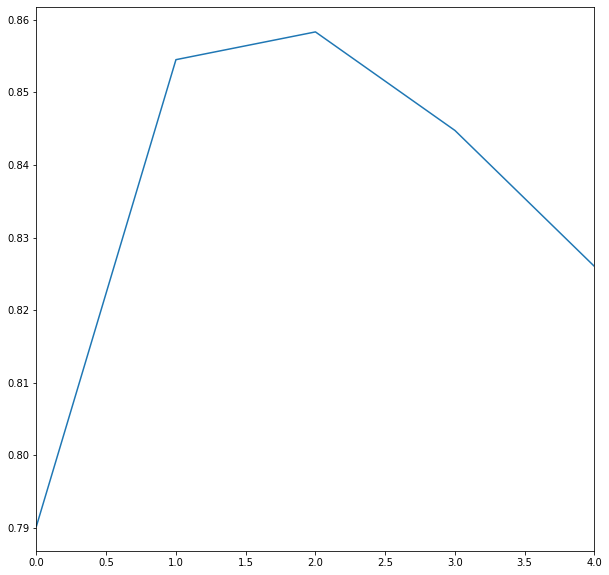

In [37]:
max_depth_param_range = [1,5,10,15,20]

dtc_acc_table = pd.DataFrame(columns = ['Max_depth','Accuracy'])
dtc_acc_table['Max_depth'] = max_depth_param_range

plt.figure(figsize=(10, 10))

j = 0
for i in max_depth_param_range:
    
    # Apply logistic regression model to training data
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    
    # Predict using model
    y_pred_dtc = dtc.predict(X_test)
    
    # Saving accuracy score in table
    dtc_acc_table.iloc[j,1] = accuracy_score(y_test,y_pred_dtc)
    j += 1
    
print(dtc_acc_table)    
dtc_acc_table.Accuracy.plot()


### <font color='red'> --> Mientras más alto sea Max_depth, más alta será la precisión y más simplificado será el modelo. Desde max_depth, la precisión comienza a caer. </font> 

### Logistic Regression

   C_parameter  Accuracy
0        0.001  0.852337
1        0.010  0.859127
2        0.100  0.860196
3        1.000  0.860439
4       10.000  0.860488
5      100.000  0.860504


Text(0, 0.5, 'Accuracy values')

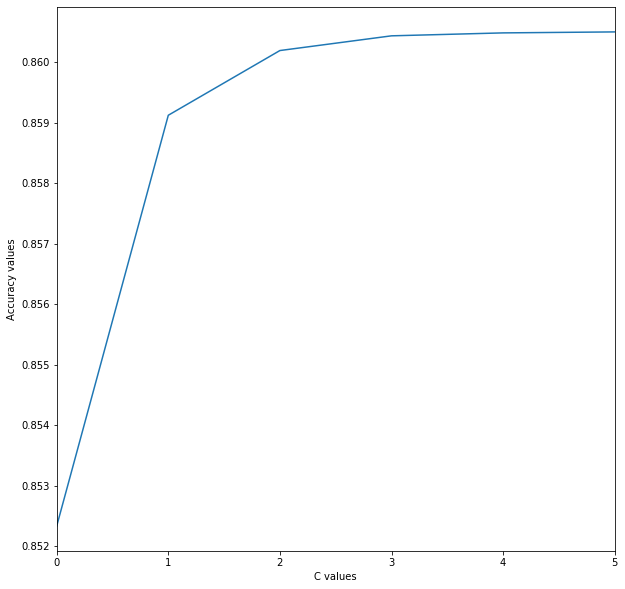

In [38]:
C_param_range = [0.001,0.01,0.1,1,10,100]

lr_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
lr_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10, 10))

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = lr.predict(X_test)
    
    # Saving accuracy score in table
    lr_acc_table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
print(lr_acc_table)    
lr_acc_table.Accuracy.plot()
plt.xlabel('C values')
plt.ylabel('Accuracy values')


### <font color='red'> --> Mientras más alto sea C (o Lambda), más alta será la precisión y más simplificado será el modelo.. </font> 

### Random Forest Classifier

In [39]:
# Build some models and check them against training data using MAE, RMSE and R2

modeloutcomes = []
modelnames = []

models = [DecisionTreeClassifier(random_state=32, max_depth=3), DecisionTreeClassifier(random_state=32, max_depth=5), DecisionTreeClassifier(random_state=32, max_depth=10), DecisionTreeClassifier(random_state=32, max_depth=20), DecisionTreeClassifier(random_state=32, max_depth=30), DecisionTreeClassifier(random_state=32, max_depth=40), DecisionTreeClassifier(random_state=32, max_depth=50)]
for model in models:
    v_results = cross_val_score(model, X_train, y_train, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
    print(type(model).__name__,v_results.mean())
    modeloutcomes.append(v_results)
    modelnames.append(name)
   

DecisionTreeClassifier 0.8346230108592825
DecisionTreeClassifier 0.8507555814649774
DecisionTreeClassifier 0.8537981609680361
DecisionTreeClassifier 0.8210306738488854
DecisionTreeClassifier 0.8066320990283894
DecisionTreeClassifier 0.8057043327315551
DecisionTreeClassifier 0.8056476139588598


   max_depth  Accuracy
0          1  0.790254
1          3   0.83537
2          5  0.854525
3         10  0.858317
4         15  0.844866
5         20  0.826862


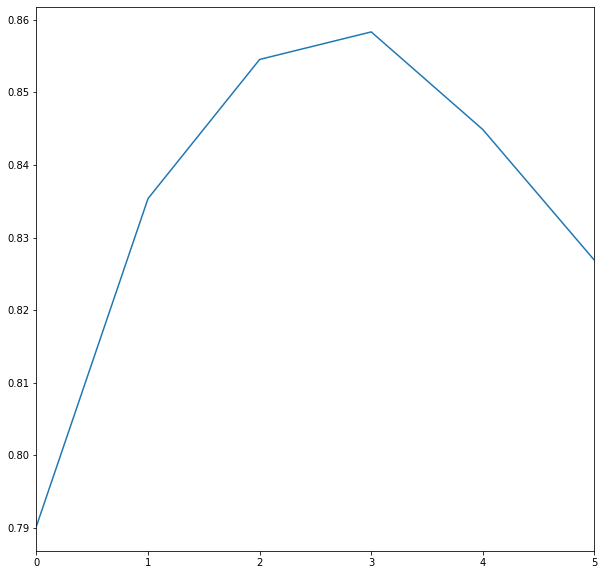

In [40]:
max_depth = [1,3,5,10,15,20]

dtc_acc_table = pd.DataFrame(columns = ['max_depth','Accuracy'])
dtc_acc_table['max_depth'] = max_depth

plt.figure(figsize=(10, 10))

j = 0
for i in max_depth:
    
    # Apply logistic regression model to training data
    dtc = DecisionTreeClassifier(max_depth = i, random_state = 32)
    dtc.fit(X_train,y_train)
    
    # Predict using model
    y_pred_dtc = dtc.predict(X_test)
    
    # Saving accuracy score in table
    dtc_acc_table.iloc[j,1] = accuracy_score(y_test,y_pred_dtc)
    j += 1
    
print(dtc_acc_table)    
dtc_acc_table.Accuracy.plot()


### <font color='red'> --> Mientras más alto el max_depth, mejor la performance. Desde Max_depth = 10, la calidad empieza a empeorar. </font> 

### K Neighbors Classifier

   N_neighbors  Accuracy
0            1   0.80915
1            5  0.841285
2           10  0.847929
3           15  0.853552
4           20  0.854427


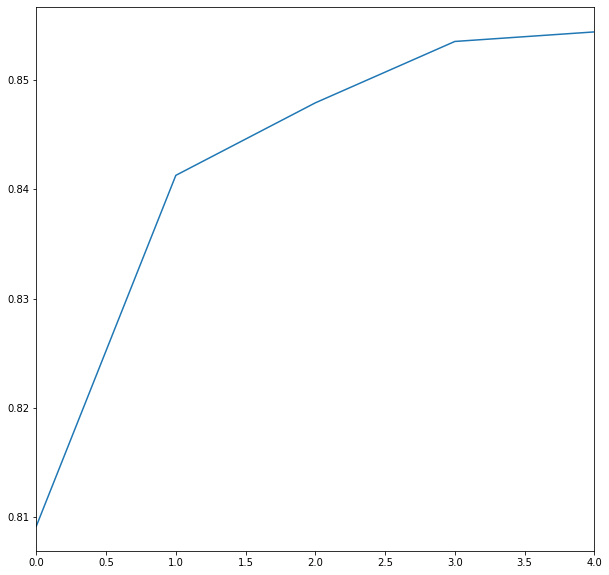

In [41]:
N_neighbors = [1,5,10,15,20]

knc_acc_table = pd.DataFrame(columns = ['N_neighbors','Accuracy'])
knc_acc_table['N_neighbors'] = N_neighbors

plt.figure(figsize=(10, 10))

j = 0
for i in N_neighbors:
    
    # Apply logistic regression model to training data
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train,y_train)
    
    # Predict using model
    y_pred_knc = knc.predict(X_test)
    
    # Saving accuracy score in table
    knc_acc_table.iloc[j,1] = accuracy_score(y_test,y_pred_knc)
    j += 1
    
print(knc_acc_table)    
knc_acc_table.Accuracy.plot()


### <font color='red'> --> Mientras más alto n_neighbors, mejor la performance. </font> 

# EJERCICIO 4: Comparación de rendimiento usando Cross Validation

In [43]:
models = []

def classification_Models(X_train, X_test, y_train, y_test ):
    

    
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('DTC', DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier(n_neighbors=5)) )
 #   models.append( ('NB',  GaussianNB()) )
 #   models.append( ('LDA',  LinearDiscriminantAnalysis()) )
 #   models.append( ('SVM',  SVC()) )
    models.append( ('XGBC', XGBClassifier()))
    models.append( ('RFC', RandomForestClassifier(n_estimators = 10, random_state=32)))

        
classification_Models(X_train, X_test, y_train, y_test)

In [44]:
modeloutcomes = []
modelnames = []
for name,model in models:
        v_results = cross_val_score(model, X_train, y_train, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)


LR 0.8574808591366666
DTC 0.80541263581344
KNN 0.8406798175697604
XGBC 0.860952886600357
RFC 0.8397480097169151


[array([0.85733559, 0.85716543, 0.85794156]), array([0.80372401, 0.80620343, 0.80631047]), array([0.84005251, 0.84193639, 0.84005056]), array([0.86055641, 0.86034979, 0.86195245]), array([0.83801062, 0.84024697, 0.84098644])]


{'whiskers': [<matplotlib.lines.Line2D at 0x1f5ce175708>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5ce175c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5ce171ec8>,
 'medians': [<matplotlib.lines.Line2D at 0x1f5ce16d188>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f5ce165548>,
 'means': []}

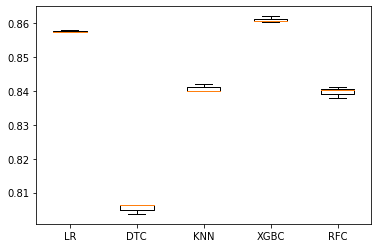

In [45]:
print(modeloutcomes)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticklabels(modelnames)
plt.boxplot(modeloutcomes)

# EJERCICIO 5: Ingeniería de variables

### A) Inclusión de variable "ArrDelay_vs_CRSElapsedTime" (creada en Tasca anterior). Esta variable expresa la cantidad de minutos demorados respecto a la duración estimada de viaje

In [46]:
columns_to_drop_a = ['FullCarrier', 'Origin', 'Dest', 'Delay_level', 'ArrTime_Range', 'DepTime_Range', 'Unnamed: 0', 'index', 'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'ArrTime', 'DepTime', '10%_Delayed']

In [47]:
X_train_a = train.drop(columns = columns_to_drop_a, axis=1).values
y_train_a = train['10%_Delayed'].values

In [48]:
X_train_a

array([[ 1.        , -0.47094575, -0.29567999, -0.25464905,  0.2464258 ,
        -0.56736541],
       [ 7.        ,  0.29888444,  0.36021072,  0.17761403, -0.05803349,
        -0.15007458],
       [ 4.        , -0.50849844, -0.29567999, -0.49866854, -0.69353809,
        -0.09454158],
       ...,
       [ 3.        , -0.56482748, -0.92242   , -0.81589386, -0.01008016,
        -0.4975525 ],
       [ 5.        ,  7.26490888,  0.87034794,  1.46394531,  1.73484966,
         2.06648548],
       [ 3.        ,  0.41154252, -0.68921441, -0.59104734,  0.21659037,
        -0.09771489]])

In [49]:
X_test_a = test.drop(columns = columns_to_drop_a, axis=1).values
y_test_a = test['10%_Delayed'].values

In [50]:
X_test_a

array([[ 5.        , -0.35828768,  1.38048515,  2.38424736,  2.29837504,
        -0.70223127],
       [ 3.        ,  7.1898035 , -0.64548836, -0.86818375, -1.44464269,
         8.14179576],
       [ 1.        , -0.05786614,  2.167554  ,  2.65441179,  1.35033688,
        -0.46264604],
       ...,
       [ 7.        ,  1.46301791, -0.73294046, -0.67645416, -0.06916023,
         2.36001705],
       [ 2.        , -0.67748556, -0.82039255, -0.70957109,  0.1581011 ,
        -0.61337847],
       [ 4.        ,  0.50542425,  0.50596421,  0.39548857,  0.18901967,
        -0.02790198]])

In [51]:
train.drop(columns=columns_to_drop_a, axis=1).head()

,DayOfWeek,DepDelay,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime
433956,1,-0.470946,-0.295680,-0.254649,0.246426,-0.567365
1178304,7,0.298884,0.360211,0.177614,-0.058033,-0.150075
1331798,4,-0.508498,-0.295680,-0.498669,-0.693538,-0.094542
1473141,4,-0.639933,-0.936995,-0.930932,-0.807661,-0.700645
1221532,5,-0.320735,2.808869,2.851370,0.803255,-0.446779


In [52]:
y_train_a

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [53]:
models

[('LR', LogisticRegression()),
 ('DTC', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('XGBC', XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None)),
 ('RFC', RandomForestClassifier(n_estimators=10, random_state=32))]

### Evaluación del nuevo modelo

In [54]:
modeloutcomes_a = []
modelnames_a = []
for name, model in models:
        v_results_a = cross_val_score(model, X_train_a, y_train_a, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results_a.mean())
        modeloutcomes_a.append(v_results_a)
        modelnames_a.append(name)

LR 0.9973828143450999
DTC 0.9997852773491919
KNN 0.9627962579596049
XGBC 0.9998419965158153
RFC 0.9998541505807425


## B) Inclusión de variables categóricas ArrTime, DepTime y ArrDelay 

### Transformación de Rangos a variables Ordinales

In [55]:
le = preprocessing.LabelEncoder()

In [56]:
columns_to_encode = ['ArrTime_Range', 'DepTime_Range', 'Delay_level']

In [57]:
train[columns_to_encode] = train[columns_to_encode].apply(le.fit_transform)

C:\Users\tomi_\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [58]:
test[columns_to_encode] = test[columns_to_encode].apply(le.fit_transform)

### Definiciòn de variables de nuevo modelo incluyendo ArrTime_Rabge, DepTime_Range, Delay_level

In [59]:
columns_to_drop_b = ['FullCarrier', 'Origin', 'Dest', 'Unnamed: 0', 'index', 'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'ArrTime', 'DepTime', '10%_Delayed']

In [60]:
train.drop(columns = columns_to_drop_b, axis=1).head()

,DayOfWeek,DepDelay,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range
433956,1,-0.470946,-0.295680,-0.254649,0.246426,-0.567365,3,15,13
1178304,7,0.298884,0.360211,0.177614,-0.058033,-0.150075,1,11,10
1331798,4,-0.508498,-0.295680,-0.498669,-0.693538,-0.094542,1,2,1
1473141,4,-0.639933,-0.936995,-0.930932,-0.807661,-0.700645,3,9,8
1221532,5,-0.320735,2.808869,2.851370,0.803255,-0.446779,0,5,2


In [61]:
X_train_b = train.drop(columns = columns_to_drop_b, axis=1).values
y_train_b = train['10%_Delayed'].values

In [62]:
X_train_b

array([[ 1.        , -0.47094575, -0.29567999, ...,  3.        ,
        15.        , 13.        ],
       [ 7.        ,  0.29888444,  0.36021072, ...,  1.        ,
        11.        , 10.        ],
       [ 4.        , -0.50849844, -0.29567999, ...,  1.        ,
         2.        ,  1.        ],
       ...,
       [ 3.        , -0.56482748, -0.92242   , ...,  3.        ,
         6.        ,  5.        ],
       [ 5.        ,  7.26490888,  0.87034794, ...,  2.        ,
         0.        , 14.        ],
       [ 3.        ,  0.41154252, -0.68921441, ...,  1.        ,
         0.        , 17.        ]])

In [63]:
X_test_b = test.drop(columns = columns_to_drop_b, axis=1).values
y_test_b = test['10%_Delayed'].values

In [64]:
X_test_b

array([[ 5.        , -0.35828768,  1.38048515, ...,  3.        ,
         1.        ,  0.        ],
       [ 3.        ,  7.1898035 , -0.64548836, ...,  2.        ,
         0.        , 18.        ],
       [ 1.        , -0.05786614,  2.167554  , ...,  0.        ,
         1.        , 18.        ],
       ...,
       [ 7.        ,  1.46301791, -0.73294046, ...,  2.        ,
        12.        , 10.        ],
       [ 2.        , -0.67748556, -0.82039255, ...,  3.        ,
         4.        ,  3.        ],
       [ 4.        ,  0.50542425,  0.50596421, ...,  1.        ,
        11.        ,  8.        ]])

In [65]:
train.drop(columns=columns_to_drop_b, axis=1).head()

,DayOfWeek,DepDelay,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range
433956,1,-0.470946,-0.295680,-0.254649,0.246426,-0.567365,3,15,13
1178304,7,0.298884,0.360211,0.177614,-0.058033,-0.150075,1,11,10
1331798,4,-0.508498,-0.295680,-0.498669,-0.693538,-0.094542,1,2,1
1473141,4,-0.639933,-0.936995,-0.930932,-0.807661,-0.700645,3,9,8
1221532,5,-0.320735,2.808869,2.851370,0.803255,-0.446779,0,5,2


In [66]:
y_train_b

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

### Evaluación del nuevo modelo

In [67]:
modeloutcomes_b = []
modelnames_b = []
for name, model in models:
        v_results_b = cross_val_score(model, X_train_b, y_train_b, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results_b.mean())
        modeloutcomes_b.append(v_results_b)
        modelnames_a.append(name)

LR 0.9998703560498862
DTC 0.9998055341240702
KNN 0.9997164040191593
XGBC 0.9998379451608397
RFC 0.999870355951404


## C) Inclusión de variables FullCarrier, Origin & Dest

### Conversión de variables Dummy

En caso de efectuar el Train Test Split antes de la conversión de variables Dummy, está sucediendo que algunas de los valores de las variables categóricas no son incluidos en el TEST set, de manera que al realizar la conversión a Dummies, la cantidad de variables totales entre TRAIN y TEST set termina por ser diferente e imposibilita la evaluación del modelo.


--> Realizo conversión a Dummy y luego divido por TRAIN y TEST

### Inclusión de DUMMY variables en DATASET copiado

In [68]:
data3 = train.copy()

In [69]:
le = preprocessing.LabelEncoder()

columns_to_encode = ['ArrTime_Range', 'DepTime_Range', 'Delay_level']

data3[columns_to_encode] = data3[columns_to_encode].apply(le.fit_transform)


In [70]:
data3 = pd.get_dummies(data=data3, columns=['FullCarrier', 'Origin', 'Dest'])

In [71]:
data3.head()

,Unnamed: 0,index,DayOfWeek,Cancelled,ArrDelay,CRSElapsedTime,DepDelay,ArrTime,DepTime,AirTime,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
433956,433957,1370696,1,0,-0.654889,-0.269780,-0.470946,20:08,18:26,-0.295680,...,0,0,0,0,0,0,0,0,0,0
1178304,1178309,610718,7,0,0.172920,0.502599,0.298884,16:52,15:09,0.360211,...,0,0,0,0,0,0,0,0,0,0
1331798,1331804,836451,4,0,-0.232178,-0.691077,-0.508498,07:54,06:16,-0.295680,...,0,0,0,0,0,0,0,0,0,0
1473141,1473147,957758,4,0,-0.795793,-0.859596,-0.639933,14:42,13:41,-0.936995,...,0,0,0,0,0,0,0,0,0,0
1221532,1221538,1184080,5,0,-0.038436,2.847822,-0.320735,10:45,07:54,2.808869,...,0,0,0,0,0,0,0,0,0,0


### Separación en TRAIN y TEST sets

In [72]:
train3, test3 = train_test_split(data3, test_size = 0.2, random_state=42)

## Definiciòn de variables de nuevo modelo incluyendo FullCarrier, Origin y Dest

In [73]:
columns_to_drop_c = ['Unnamed: 0', 'index', 'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'ArrTime', 'DepTime', '10%_Delayed']

In [74]:
X_train_c = train3.drop(columns = columns_to_drop_c, axis=1).values
y_train_c = train3['10%_Delayed'].values

##### Checking same amount of columns:

In [75]:
print(len(train.drop(columns = columns_to_drop_c, axis=1).columns))
print(len(test.drop(columns = columns_to_drop_c, axis=1).columns))

12
12


In [76]:
X_test_c = test3.drop(columns = columns_to_drop_c, axis=1).values
y_test_c = test3['10%_Delayed'].values

In [77]:
X_test_c

array([[ 3.        , -0.30195864,  0.19988188, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.89972752,  0.25818328, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        , -0.50849844,  0.75374514, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 7.        ,  0.14867367, -0.42685813, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        , -0.15174787, -0.16450185, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.        , -0.62115652, -0.96614604, ...,  0.        ,
         0.        ,  0.        ]])

In [78]:
y_train_c

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [79]:
train3.drop(columns=columns_to_drop_c, axis=1).head()

,DayOfWeek,DepDelay,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range,FullCarrier_AirTran Airways Corporation,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
1349054,4,0.298884,-0.528886,-0.592790,-0.421967,0.609934,2,14,11,0,...,0,0,0,0,0,0,0,0,0,0
908608,6,-0.583604,1.293033,1.697507,1.305830,-0.608618,3,7,1,0,...,0,0,0,0,0,0,0,0,0,0
926273,5,-0.677486,-0.062474,-0.151812,-0.057837,-0.692711,3,11,10,0,...,0,0,0,0,0,0,0,0,0,0
636981,4,-0.508498,1.876047,2.748534,1.928829,-0.691125,3,14,7,0,...,0,0,0,0,0,0,0,0,0,0
511971,7,-0.639933,-0.995297,-0.920474,-0.408871,-0.586405,3,12,11,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
test3.drop(columns=columns_to_drop_c, axis=1).head()

,DayOfWeek,DepDelay,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range,FullCarrier_AirTran Airways Corporation,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
755946,3,-0.301959,0.199882,-0.153555,-0.630913,0.295776,2,17,15,0,...,0,0,0,0,0,0,0,0,0,0
942031,1,0.899728,0.258183,-0.047232,-0.448947,0.367176,2,13,11,0,...,0,0,0,0,0,0,0,0,0,0
1443796,4,-0.508498,0.753745,0.543643,0.067512,-0.435673,0,17,14,0,...,0,0,0,0,0,0,0,0,0,0
523763,7,-0.301959,-0.572612,-0.554444,-0.081961,-0.150075,1,14,13,0,...,0,0,0,0,0,0,0,0,0,0
731764,7,-0.301959,-0.412283,-0.488211,-0.327636,-0.429326,0,14,12,0,...,0,0,0,0,0,0,0,0,0,0


### Evaluación y comparación de los nuevos modelos

In [81]:
modeloutcomes_c = []
modelnames_c = []
for name, model in models:
        v_results_c = cross_val_score(model, X_train_c, y_train_c, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results_c.mean())
        modeloutcomes_c.append(v_results_c)
        modelnames_c.append(name)

LR 0.9998683303785514
DTC 0.9998075596538333
KNN 0.9963740214780364
XGBC 0.9998024954908887
RFC 0.9998733945414959


In [82]:
from sklearn.metrics import accuracy_score

for name,model in models:
    trainedmodel = model.fit(X_train_c,y_train_c)
    
    # prediction
    ypredict_c = trainedmodel.predict(X_test_c)
    
    acc = accuracy_score(y_test_c,ypredict_c)
    classreport = classification_report(y_test_c,ypredict_c)
    confMat = confusion_matrix(y_test_c,ypredict_c)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    
    
    # save models
    import pickle as pk
    
    with open('model_'+name+'.pickle','wb') as f:
        pk.dump(trainedmodel,f)

C:\Users\tomi_\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



****************************LR
The accuracy: 0.9998784588583235
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15666
           1       1.00      1.00      1.00     33700

    accuracy                           1.00     49366
   macro avg       1.00      1.00      1.00     49366
weighted avg       1.00      1.00      1.00     49366

The Confusion Matrix:
 [[15666     0]
 [    6 33694]]

****************************DTC
The accuracy: 0.9998176882874853
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15666
           1       1.00      1.00      1.00     33700

    accuracy                           1.00     49366
   macro avg       1.00      1.00      1.00     49366
weighted avg       1.00      1.00      1.00     49366

The Confusion Matrix:
 [[15659     7]
 [    2 33698]]

****************************KNN
The accuracy: 0.99

C:\Users\tomi_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

****************************XGBC
The accuracy: 0.9998582020013774
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15666
           1       1.00      1.00      1.00     33700

    accuracy                           1.00     49366
   macro avg       1.00      1.00      1.00     49366
weighted avg       1.00      1.00      1.00     49366

The Confusion Matrix:
 [[15663     3]
 [    4 33696]]

****************************RFC
The accuracy: 0.9998784588583235
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15666
           

### <font color='red'> Random Forest Classifier y Logistic Regression son los dos mejores modelos al presentar la menor cantidad de falsos positivos y falsos negativos</font> 

### Ecportación de fichero para utilización en Tasca de Clusterización

In [105]:
train3.to_csv('train3.csv')

# EJERCICIO 6: Modelos excluyendo "DepDelay"

### Modelo con selección de variables básicas sin DepDelay

In [83]:
train_columns_to_drop_final = ['DepDelay', 'FullCarrier', 'Origin', 'Dest', 'Delay_level', 'ArrTime_Range', 'DepTime_Range', 'Unnamed: 0', 'index', 'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'ArrTime', 'DepTime', '10%_Delayed']

In [84]:
train.drop(columns=train_columns_to_drop_final, axis=1)

,DayOfWeek,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime
433956,1,-0.295680,-0.254649,0.246426,-0.567365
1178304,7,0.360211,0.177614,-0.058033,-0.150075
1331798,4,-0.295680,-0.498669,-0.693538,-0.094542
1473141,4,-0.936995,-0.930932,-0.807661,-0.700645
1221532,5,2.808869,2.851370,0.803255,-0.446779
...,...,...,...,...,...
795999,7,-1.184776,-1.154035,-1.655559,0.854279
14802,7,-1.228502,-1.143577,-1.226145,-0.503899
1044164,3,-0.922420,-0.815894,-0.010080,-0.497552
192123,5,0.870348,1.463945,1.734850,2.066485


In [85]:
X_train_final = train.drop(columns = train_columns_to_drop_final, axis=1).values
y_train_final = train['10%_Delayed'].values

In [86]:
X_train_final

array([[ 1.        , -0.29567999, -0.25464905,  0.2464258 , -0.56736541],
       [ 7.        ,  0.36021072,  0.17761403, -0.05803349, -0.15007458],
       [ 4.        , -0.29567999, -0.49866854, -0.69353809, -0.09454158],
       ...,
       [ 3.        , -0.92242   , -0.81589386, -0.01008016, -0.4975525 ],
       [ 5.        ,  0.87034794,  1.46394531,  1.73484966,  2.06648548],
       [ 3.        , -0.68921441, -0.59104734,  0.21659037, -0.09771489]])

In [87]:
X_test_final = test.drop(columns = train_columns_to_drop_final, axis=1).values
y_test_final = test['10%_Delayed'].values

In [88]:
X_test_final

array([[ 5.        ,  1.38048515,  2.38424736,  2.29837504, -0.70223127],
       [ 3.        , -0.64548836, -0.86818375, -1.44464269,  8.14179576],
       [ 1.        ,  2.167554  ,  2.65441179,  1.35033688, -0.46264604],
       ...,
       [ 7.        , -0.73294046, -0.67645416, -0.06916023,  2.36001705],
       [ 2.        , -0.82039255, -0.70957109,  0.1581011 , -0.61337847],
       [ 4.        ,  0.50596421,  0.39548857,  0.18901967, -0.02790198]])

In [89]:
train.drop(columns=train_columns_to_drop_final, axis=1).head()

,DayOfWeek,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime
433956,1,-0.295680,-0.254649,0.246426,-0.567365
1178304,7,0.360211,0.177614,-0.058033,-0.150075
1331798,4,-0.295680,-0.498669,-0.693538,-0.094542
1473141,4,-0.936995,-0.930932,-0.807661,-0.700645
1221532,5,2.808869,2.851370,0.803255,-0.446779


In [90]:
y_train_final

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

### Análisis de performance del modelo

In [91]:
modeloutcomes_final = []
modelnames_final = []
for name, model in models:
        v_results_final = cross_val_score(model, X_train_final, y_train_final, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results_final.mean())
        modeloutcomes_final.append(v_results_final)
        modelnames_final.append(name)

LR 0.9984969405580048
DTC 0.99979337991142
KNN 0.9758376197044193
XGBC 0.9998257908989485
RFC 0.9998784588583196


### <font color='red'> La precisión del modelo baja significativamente al eliminar "DepDelay" como variable independiente </font> 

### Modelo con "feature engeneering" sin DepDelay

In [92]:
columns_to_drop3_final = ['DepDelay', 'Unnamed: 0', 'index', 'Cancelled', 'ArrDelay', 'CRSElapsedTime', 'ArrTime', 'DepTime', '10%_Delayed']

In [93]:
X_train3_final = train3.drop(columns = columns_to_drop3_final, axis=1).values
y_train3_final = train3['10%_Delayed'].values

##### Checking same amount of columns:

In [94]:
print(len(train3.drop(columns = columns_to_drop3_final, axis=1).columns))
print(len(test3.drop(columns = columns_to_drop3_final, axis=1).columns))

623
623


In [95]:
X_train3_final

array([[ 4.        , -0.52888557, -0.59279034, ...,  0.        ,
         0.        ,  0.        ],
       [ 6.        ,  1.29303306,  1.69750681, ...,  0.        ,
         0.        ,  0.        ],
       [ 5.        , -0.0624744 , -0.15181227, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        ,  0.75374514,  0.82252267, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.71836511, -0.62590727, ...,  0.        ,
         0.        ,  0.        ],
       [ 5.        , -0.0333237 , -0.24244808, ...,  0.        ,
         0.        ,  0.        ]])

In [96]:
X_test3_final = test3.drop(columns = columns_to_drop3_final, axis=1).values
y_test3_final = test3['10%_Delayed'].values

In [97]:
X_test3_final

array([[ 3.        ,  0.19988188, -0.15355527, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.25818328, -0.04723249, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        ,  0.75374514,  0.54364326, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 7.        , -0.42685813, -0.49692554, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        , -0.16450185, -0.15355527, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.        , -0.96614604, -0.88909971, ...,  0.        ,
         0.        ,  0.        ]])

In [98]:
y_train3_final

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [99]:
train3.drop(columns=columns_to_drop3_final, axis=1).head()

,DayOfWeek,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range,FullCarrier_AirTran Airways Corporation,FullCarrier_Alaska Airlines Inc.,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
1349054,4,-0.528886,-0.592790,-0.421967,0.609934,2,14,11,0,0,...,0,0,0,0,0,0,0,0,0,0
908608,6,1.293033,1.697507,1.305830,-0.608618,3,7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
926273,5,-0.062474,-0.151812,-0.057837,-0.692711,3,11,10,0,0,...,0,0,0,0,0,0,0,0,0,0
636981,4,1.876047,2.748534,1.928829,-0.691125,3,14,7,0,0,...,0,0,0,0,0,0,0,0,0,0
511971,7,-0.995297,-0.920474,-0.408871,-0.586405,3,12,11,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
test3.drop(columns=columns_to_drop3_final, axis=1).head()

,DayOfWeek,AirTime,Distance,AvgSpeed,ArrDelay_vs_CRSElapsedTime,Delay_level,ArrTime_Range,DepTime_Range,FullCarrier_AirTran Airways Corporation,FullCarrier_Alaska Airlines Inc.,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
755946,3,0.199882,-0.153555,-0.630913,0.295776,2,17,15,0,0,...,0,0,0,0,0,0,0,0,0,0
942031,1,0.258183,-0.047232,-0.448947,0.367176,2,13,11,0,0,...,0,0,0,0,0,0,0,0,0,0
1443796,4,0.753745,0.543643,0.067512,-0.435673,0,17,14,0,0,...,0,0,0,0,0,0,0,0,0,0
523763,7,-0.572612,-0.554444,-0.081961,-0.150075,1,14,13,0,0,...,0,0,0,0,0,0,0,0,0,0
731764,7,-0.412283,-0.488211,-0.327636,-0.429326,0,14,12,0,0,...,0,0,0,0,0,0,0,0,0,0


### Evaluación del nuevo modelo

In [101]:
modeloutcomes_3_final = []
modelnames_3_final = []
for name, model in models:
        v_results_3_final = cross_val_score(model, X_train3_final, y_train3_final, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results_3_final.mean())
        modeloutcomes_3_final.append(v_results_3_final)
        modelnames_3_final.append(name)

LR 0.9998683303785514
DTC 0.9998227523734821
KNN 0.9910262126288893
XGBC 0.999792367011123
RFC 0.9998733945414959


### <font color='red'> La precisión del modelo baja significativamente al eliminar "DepDelay" como variable independiente </font> 

In [102]:
for name,model in models:
    trainedmodel = model.fit(X_train3_final,y_train3_final)
    
    # prediction
    ypredict3_c = trainedmodel.predict(X_test3_final)
    
    acc = accuracy_score(y_test3_final,ypredict3_c)
    classreport = classification_report(y_test3_final,ypredict3_c)
    confMat = confusion_matrix(y_test3_final,ypredict3_c)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    
    
    # save models
    import pickle as pk
    
    with open('model_'+name+'.pickle','wb') as f:
        pk.dump(trainedmodel,f)

C:\Users\tomi_\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



****************************LR
The accuracy: 0.9998784588583235
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15666
           1       1.00      1.00      1.00     33700

    accuracy                           1.00     49366
   macro avg       1.00      1.00      1.00     49366
weighted avg       1.00      1.00      1.00     49366

The Confusion Matrix:
 [[15666     0]
 [    6 33694]]

****************************DTC
The accuracy: 0.9998176882874853
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15666
           1       1.00      1.00      1.00     33700

    accuracy                           1.00     49366
   macro avg       1.00      1.00      1.00     49366
weighted avg       1.00      1.00      1.00     49366

The Confusion Matrix:
 [[15660     6]
 [    3 33697]]

****************************KNN
The accuracy: 0.99

C:\Users\tomi_\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

****************************XGBC
The accuracy: 0.9998987157152697
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15666
           1       1.00      1.00      1.00     33700

    accuracy                           1.00     49366
   macro avg       1.00      1.00      1.00     49366
weighted avg       1.00      1.00      1.00     49366

The Confusion Matrix:
 [[15664     2]
 [    3 33697]]

****************************RFC
The accuracy: 0.9998784588583235
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15666
           

### <font color='red'> Con excepción de KNN, los modelos mantienen su precisión bastante alta y hasta mejoran, como es el caso de XGBC </font> 